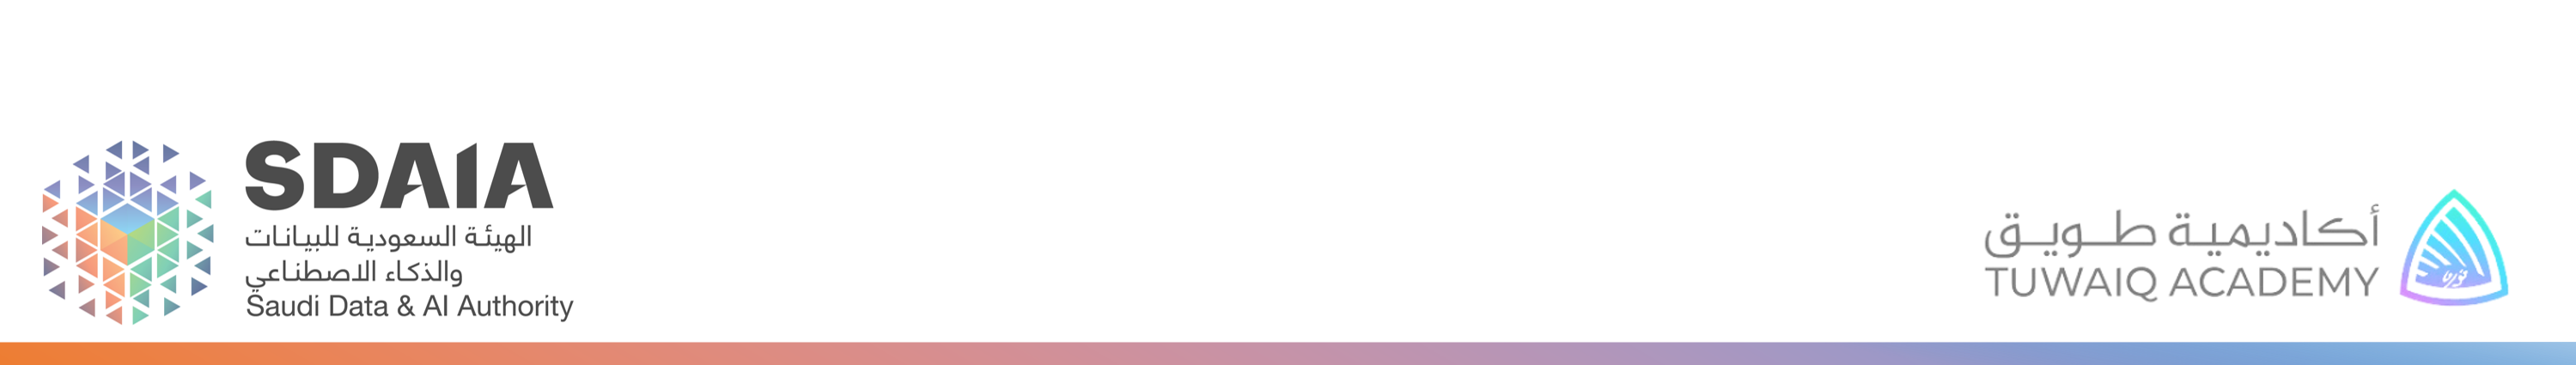

# Tafakkur: quick reflections examples overview

In [1]:
import sys, os
sys.path.append('..')
root = '../root/'

In [2]:
from util import summarize_trial, log_trial, save_agents
from agents_notebook import CoTAgent, ReflexionStrategy
from prompts_ar import cot_simple_reflect_agent_prompt, cot_simple_reflect_prompt, cot_simple_agent_prompt
from fewshots_ar import COTQA_SIMPLE6, COT_SIMPLE_REFLECTION
import time

In [3]:
# --------- EXAMPLE 1 ----------- mathmatical reasoning
q1 = f"""قدم محمد طلبًا لشراء سلع ضرورية عبر الإنترنت. وصلت قيمة السلع إلى 400 ريال. 
 كما تمت إضافة رسوم ضرائب بنسبة 15٪ إلى إجمالي الفاتورة وتم تحصيل رسوم توصيل بقيمة 30 ريال.
 ثم أضاف إكرامية بقيمة 10 ريال. بعد الرسوم الإضافية والإكرامية،
 كم سيصبح السعر النهائي للفاتورة؟ """

# --------- EXAMPLE 2 -----------  Symbolic reasoning
q2 = f"""خذ آخر حرف من كل كلمة وادمجها معا : لا استسلم"""

# --------- EXAMPLE 3 -----------  Commonsense reasoning
q3 = f"""أنت في الخارج تمشي فجأةً بدأ المطر يهطل بغزارة. ماذا ستفعل أولاً؟

خيارات الإجابة:
1- الاستظلال تحت الشجرة
2- البحث عن مأوى
3- إشعال النار للحصول على بعض الدفء
4- شراء مظلة"""


Refliction Strategy

In [5]:
print(ReflexionStrategy.__doc__)


    NONE: No reflection
    LAST_ATTEMPT: Use last reasoning trace in context 
    REFLEXION: Apply reflexion to the next reasoning trace 
    LAST_ATTEMPT_AND_REFLEXION: Use last reasoning trace in context and apply reflexion to the next reasoning trace 
    


In [6]:
strategy: ReflexionStrategy = ReflexionStrategy.REFLEXION

COT Agent

In [24]:
agent = CoTAgent(question=q3, # pass questions
                   context='', # no context
                   key='', # empty key
                   agent_prompt=cot_simple_agent_prompt if strategy == ReflexionStrategy.NONE \
                   else cot_simple_reflect_agent_prompt,
                   cot_examples=COTQA_SIMPLE6, # pass few-shots
                   reflect_prompt=cot_simple_reflect_prompt,
                   reflect_examples=COT_SIMPLE_REFLECTION)

## Mathmatical reasoning

In [11]:
# calculate the time for each iterations
start_time = time.time()

agent.run(reflexion_strategy=strategy)

end_time = time.time()

elapsed_time = end_time - start_time

print(f"Agent execution time: {elapsed_time:.2f} seconds")

تفكير :
الرد: إنهاء[السعر النهائي للفاتورة سيكون 475 ريال]
Agent execution time: 1.73 seconds


In [12]:
# calculate the time for each iteration
start_time = time.time()

agent.run(reflexion_strategy=strategy)

end_time = time.time()

elapsed_time = end_time - start_time

print(f"Agent execution time: {elapsed_time:.2f} seconds")

Running Reflexion strategy...
سبق وأن جربت الإجابة على هذا السؤال، لكن دون نجاح. تقدم لك التقييمات التالية خطة لتجنب تكرار نفس الخطأ. استفد منها لتحسين استراتيجيتك وتقديم إجابة صحيحة على السؤال المطروح.  
Reflections:
- لقد فشلت في الإجابة على السؤال بشكل صحيح، لأنك قمت بحساب الرسوم الإضافية والإكرامية بشكل صحيح، ولكن لم تقم بحساب الضرائب بشكل صحيح. الضرائب بنسبة 15٪ من قيمة السلع الأصلية (400 ريال) تساوي 60 ريال. لذلك، السعر النهائي للفاتورة يجب أن يكون 400 (قيمة السلع) + 60 (الضرائب) + 30 (رسوم التوصيل) + 10 (الإكرامية) = 500 ريال.
تفكير :
الرد: إنهاء[السعر النهائي للفاتورة سيكون 500 ريال]
Agent execution time: 5.95 seconds


## Symbolic reasoning

In [22]:
# calculate the time for each iteration
start_time = time.time()

agent.run(reflexion_strategy=strategy)

end_time = time.time()

elapsed_time = end_time - start_time

print(f"Agent execution time: {elapsed_time:.2f} seconds")

تفكير : يجب عليّ أولاً أن أحدد آخر حرف من كل كلمة في العبارة "لا استسلم"، وهي "ا"، ثم يمكنني دمجها معًا للحصول على الكلمة النهائية. لذلك، سأقوم بدمج الحروف "ا" من كل كلمة معًا للحصول على الكلمة النهائية "ااا".
الرد: إنهاء[ااا]
Agent execution time: 3.32 seconds


In [23]:
# calculate the time for each iteration
start_time = time.time()

agent.run(reflexion_strategy=strategy)

end_time = time.time()

elapsed_time = end_time - start_time

print(f"Agent execution time: {elapsed_time:.2f} seconds")

Running Reflexion strategy...
سبق وأن جربت الإجابة على هذا السؤال، لكن دون نجاح. تقدم لك التقييمات التالية خطة لتجنب تكرار نفس الخطأ. استفد منها لتحسين استراتيجيتك وتقديم إجابة صحيحة على السؤال المطروح.  
Reflections:
- لقد فشلت في الإجابة على السؤال بشكل صحيح لأنك لم تحدد آخر حرف من كل كلمة بشكل صحيح. في المرة القادمة، يجب عليك التركيز على تحديد الحروف الصحيحة ودمجها بشكل صحيح للحصول على الإجابة الصحيحة. يمكنك محاولة مراجعة السؤال مرة أخرى والتأكد من تحديد الحروف الصحيحة قبل الإجابة.
تفكير : دعونا نفكر خطوة بخطوة، آخر حرف في كلمة "لا" هو "ا"، وآخر حرف في كلمة "استسلم" هو "م"، لذلك يمكننا دمجهما معًا للحصول على "ام".
الرد: إنهاء[ام]
Agent execution time: 5.75 seconds


## Commonsense reasoning

In [25]:
# calculate the time for each iteration
start_time = time.time()

agent.run(reflexion_strategy=strategy)

end_time = time.time()

elapsed_time = end_time - start_time

print(f"Agent execution time: {elapsed_time:.2f} seconds")

تفكير :
الرد: إنهاء[البحث عن مأوى]
Agent execution time: 1.34 seconds
